**<h1><font color='red'><ins><center>¿PODREMOS CONVENCER A TODOS LOS CLIENTES QUE SOLICITEN UN PRÉSTAMOS EN THERA BANK?</center></ins></font></h1>**

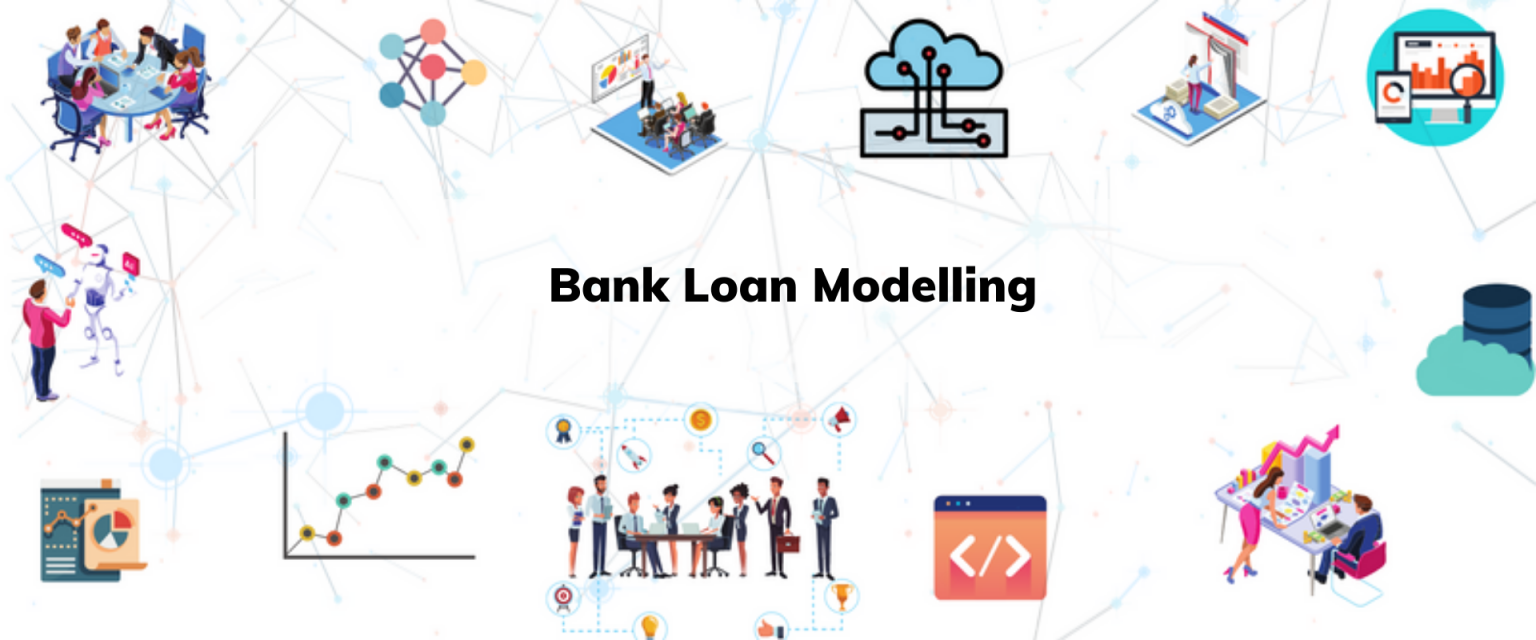

# **INDICE**

[1. Introducción](#scrollTo=JnHOj5Kh5KWG)\
[2. Objetivos](#scrollTo=oS0GiJJV4ioM)\
[3. Hipotesis](#scrollTo=eMofo1oy4l_1)\
[4. Base de Datos](#scrollTo=f3Is_0Sn7zIM)\
[5. Estudio](#scrollTo=Vs5OsEFxGohS)\
[6. Detección de clientes atípicos](#scrollTo=CQBGvLByMZSj)\
[7. Analizando los datos](#scrollTo=MlXcAPxqSVJI)
* [7.1 Difusion de datos](#scrollTo=fnNw-hPyPqGP)
* [7.2 Análisis mas profundo de las caracteristicas de los distintos clientes](#scrollTo=NcTONu39SGER)
 * [7.2.1 Cantidad de personas por regiones](#scrollTo=YaQhWkyMm3RW)
 * [7.2.2 Gasto](#scrollTo=SwRU4bJTQ8co)
 * [7.2.3 Heatmap](#scrollTo=6W98r_AElwBu)
 * [7.2.4 Grupo de ingreso segun la cuenta](#scrollTo=x0eV-m43nby1)
 * [7.2.5 Boxplot de comparacion](#scrollTo=fZ51zKeuoA3n)
 * [7.2.6 Densidad de hipoteca vs prestamos](#scrollTo=Wubld0ifoJwY)
 * [7.2.7 Densidad de la edad vs prestamos](#scrollTo=vpLDS42aoPNo)
 * [7.2.8 Gastos de tarjeta de credito segun la educacion](#scrollTo=_Wwbiev3oUiI)
 * [7.2.9 Porcentajes de prestamos](#scrollTo=HzqVqy7UUYux)

[8. Estructurando el proyecto](#scrollTo=BIBcaU9UeHRg)
* [8.1 Arbol de decisiones](#scrollTo=1wRhsFcEeYS-)
* [8.2 Matriz de confusión](#scrollTo=1tjHrX5YonOa)

* [8.3 Conclusión arboles de decisiones](#scrollTo=W85t_DZ2mMTF)
* [8.4 Evaluando el modelo](#scrollTo=7Q1XmuyinhVE)
* [8.5 Conclusión](#scrollTo=vlfhA6OCmUa1)

[9. Conclusion](#scrollTo=ALf8kUi_IDSj)

**<h1><font color='red'><ins><center>Modelado de préstamos personales</center></ins></font></h1>**

# <h3><strong>1. Introduccion</strong></h3>

Thera Bank es un banco estadounidense que tiene una base de clientes en crecimiento. La mayoría de estos clientes son clientes pasivos (depositantes) con distintos tamaños de depósitos. El número de clientes que también son prestatarios (clientes de activos) es bastante pequeño, y el banco está interesado en expandir esta base rápidamente para generar más negocios de préstamos y, en el proceso, ganar más a través de los intereses de los préstamos. En particular, la gerencia quiere explorar formas de convertir a sus clientes pasivos en clientes de préstamos personales (mientras los retiene como depositantes).

# <h3><strong>2. Objetivos</strong></h3>

Como científico de datos en Thera Bank, debemos determinar las características mas significativas del cliente, con estudios de estadísticas para medir la precisión o el error que pueda tener el modelo y que sea alcanzable mediante iteraciones, que ayude al departamento de marketing, a identificar y predecir con una mayor probabilidad, a clientes potenciales de solicitar un préstamo, mediante un análisis de datos, que llevará un tiempo en que se realizará este proyecto, siendo este de 7 meses.

# <h3><strong>3. Hipotesis</strong></h3>
- ¿Qué variables son las más significativas?

- ¿La región o condado son variables significativas?

- ¿A qué segmento de clientes debería dirigirse más?
- ¿La edad tiene algún impacto en el préstamo de compra del cliente?
- ¿Las personas con menos ingresos piden préstamos?

**<h3>Integrantes del equipo:</h3>**
*   Augusto Barchi

# **<ins>4. Base de Datos</ins>**

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats 
%matplotlib inline
import warnings
import statsmodels.api as sm
import missingno as msno
import requests
import json
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier  #arbol de decision
from sklearn import tree #arbol de decision
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
url = 'https://raw.githubusercontent.com/Augustobar1991/Proyecto-Coderhouse-Data-Science/main/Bank/Bank.csv'
df_bank = pd.read_csv(url) # leemos nuestro dataset (es un archivo csv)

In [ ]:
df_loan=df_bank.copy()
df_loan.drop(['ID'],axis=1,inplace=True)
df_loan.rename(columns={"Age":"Edad",
                        "Experience": "Experiencia",
                        "Income": "Sueldo",
                        "ZIP Code":"CP",
                        "Personal Loan":"Prestamo",
                        "Securities Account":"Cuenta_de_Seguridad",
                        "Family": "Familia",
                        "CCAvg": "Gasto_de_tarjeta_cred",
                        "Education": "Educacion",
                        "Mortgage": "Hipoteca",
                        "Securities Account": "Cuenta_de_seguridad",
                        "CD Account": "Cuenta_deposito",
                        "CreditCard": "Tarjeta_Crédito"
},inplace=True)

In [ ]:
# funcion creada para tener una paleta de colores en hex
sns.set()
def hex_to_rgb(hex_value):
  h = hex_value.lstrip('#')
  return tuple(int(h[i:i + 2], 16) / 255.0 for i in (0, 2, 4))
hex_colors = ['#941a14', '#e35d24','#eadedd','#3ba1ae','#0d3e56']
rgb_colors = list(map(hex_to_rgb, hex_colors))
color_matrix = sns.color_palette("blend:#eadedd,#0d3e56", as_cmap=True)
color_headmap = sns.color_palette("light:#0d3e56", as_cmap=True)

In [ ]:
url='https://raw.githubusercontent.com/Augustobar1991/Proyecto-Coderhouse-Data-Science/main/Bank/ZipCode_County.json'
respuesta= requests.get(url)
texto=respuesta.text
json_data=json.loads(texto)
CPUS=pd.DataFrame.from_dict(json_data)
CPUS.zip_code = CPUS.zip_code.astype('int64')
CPUS.drop(columns=["acceptable_cities", "active","area_codes",'city','country','lat','long','state','timezone'
,'unacceptable_cities','world_region','zip_code_type'], inplace=True) 
CPUS.rename(columns={"zip_code":"CP","county":"Condado"},inplace=True)
df_loan = pd.merge(df_loan, CPUS, on=['CP'], how='left')

# **5. Estudio de las edades**

In [ ]:
# Comprobar valores negativos y cero para la experiencia
df_loan[df_loan['Experiencia']<0]['Edad'].describe()
df_loan.loc[df_loan['Experiencia']<0,'Experiencia']=np.abs(df_loan['Experiencia'])
df_loan[df_loan['Experiencia']==0]['Edad'].describe()

count    66.000000
mean     25.636364
std       1.145377
min      24.000000
25%      25.000000
50%      26.000000
75%      26.000000
max      30.000000
Name: Edad, dtype: float64

<h4>Aclaracion: Por lo que se ve la experiencia es negativa para todas las observaciones con 23, 24 años y algunos otros. Según la edad y la educación, parece que los valores fueron negativos por error. cambiándolo así a valores absolutos de experiencia.</h4>

In [ ]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experiencia,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Sueldo,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CP,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Familia,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
Gasto_de_tarjeta_cred,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Educacion,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Hipoteca,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Prestamo,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Cuenta_de_seguridad,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**<h4>Conclusion de la Hipótesis de las edades</h4>**


- La edad de los clientes está en el rango de 23 a 67 años, con una media y una mediana de ~45.
- La experiencia máxima es de 43 años. donde la media y la mediana son ~20.
- Los ingresos están en el rango de 8k a 224k USD. La media es 73k USD y la mediana es 64k USD. 224 El salario máximo debe verificarse.
- La hipoteca máxima tomada es de 635k USD. Necesito verificar esto.
- El gasto promedio en tarjeta de crédito por mes oscila entre 0 y 10.000 con una media de 2.500 USD y una mediana de 2.000 USD.

# **6. Detección de clientes atípicos**

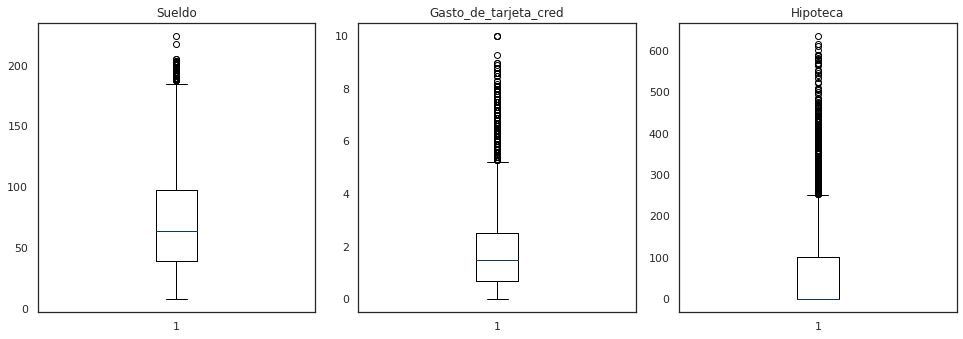

In [ ]:
# convertir variable categórica a tipo de categoría
category_col = ['Prestamo', 'Cuenta_de_seguridad','Familia', 'Cuenta_deposito', 'Online', 'Tarjeta_Crédito', 'CP', 'Educacion','Condado']
df_loan[category_col] = df_loan[category_col].astype('category')
# detección de valores atípicos mediante diagrama de caja
numeric_columns =['Sueldo','Gasto_de_tarjeta_cred','Hipoteca']
plt.figure(figsize=(18,18))
for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df_loan[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**<h4>Chequeamos los Outliers del Sueldo con respecto a las personas que hayan o no realizado un prestamo.</h4>**

Mostramos los valores minimos, maximos y cuartiles para los que pidieron un prestamo o no, de acuerdo al sueldo.

In [ ]:
groupby_prestamo_sueldo=df_loan.groupby("Prestamo")["Sueldo"]
sueldo_cuartiles = (groupby_prestamo_sueldo).quantile([0.25,0.50,0.75])
minsueldo=groupby_prestamo_sueldo.min()
maxsueldo=groupby_prestamo_sueldo.max()

print('\x1b[1m'+'Sueldo minimo' + '\x1b[0m')
print(f"{minsueldo}")
print('-----------------------------------------')
print('\x1b[1m'+'Sueldo cuartil' + '\x1b[0m')
print(f"{sueldo_cuartiles}")
print('-----------------------------------------')
print('\x1b[1m'+'Sueldo maximo' + '\x1b[0m')
print(f"{maxsueldo}")

Sueldo minimo
Prestamo
0     8
1    60
Name: Sueldo, dtype: int64
-----------------------------------------
Sueldo cuartil
Prestamo      
0         0.25     35.0
          0.50     59.0
          0.75     84.0
1         0.25    122.0
          0.50    142.5
          0.75    172.0
Name: Sueldo, dtype: float64
-----------------------------------------
Sueldo maximo
Prestamo
0    224
1    203
Name: Sueldo, dtype: int64


**<h4><font color='red'>Aclaracion: Como vemos los sueldos mayores a 84 se consideran outliers cuando no poseen prestamos, y 172 cuando tienen un préstamo. Siendo los valores mínimos de 8 y máximos de 224 cuando no tienen un préstamo y 60 el sueldo mínimo y 203 el sueldo máximo cuando pidieron un préstamo</font></h4>**

# **7. Analizando los datos**

## **7.1 Difusion de datos**

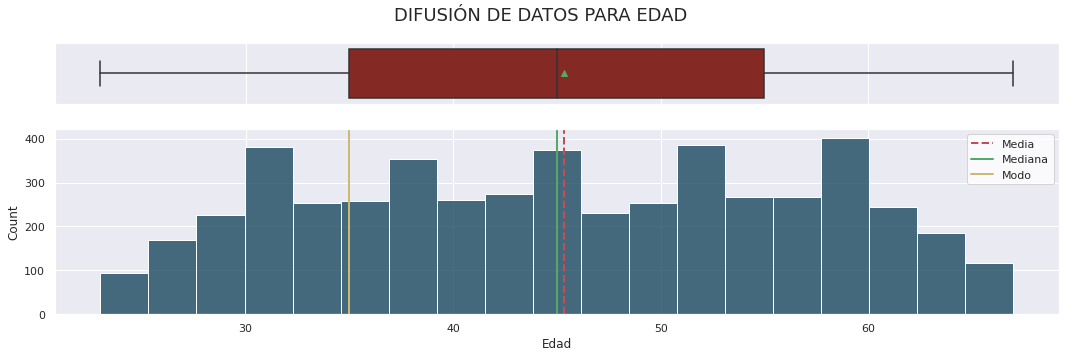

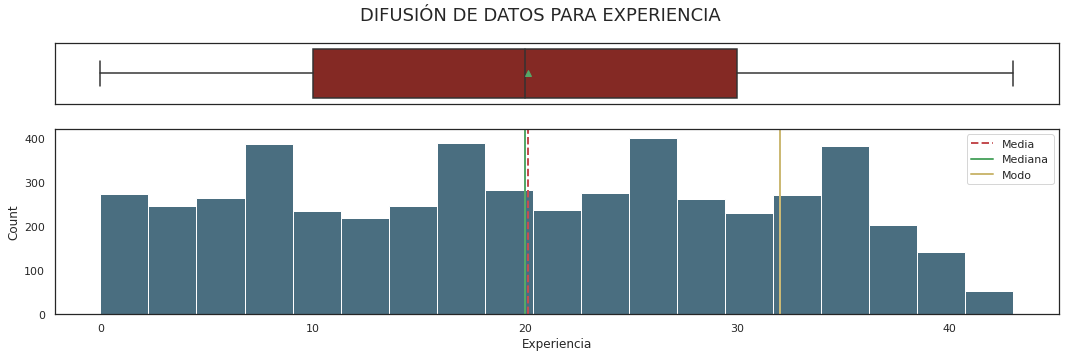

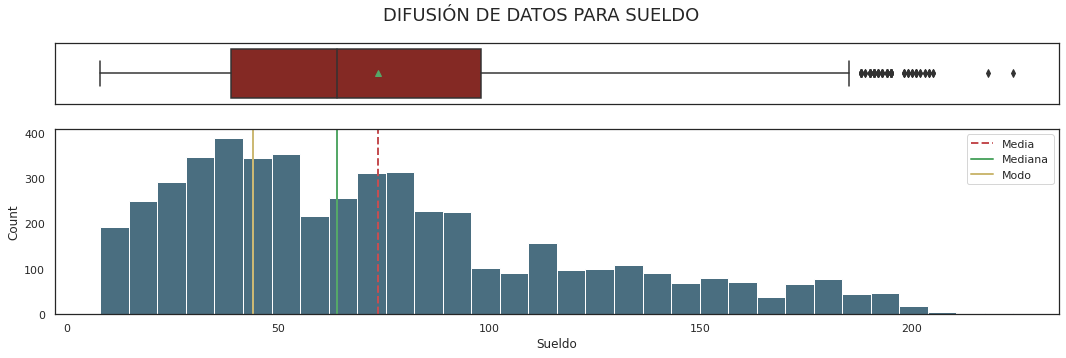

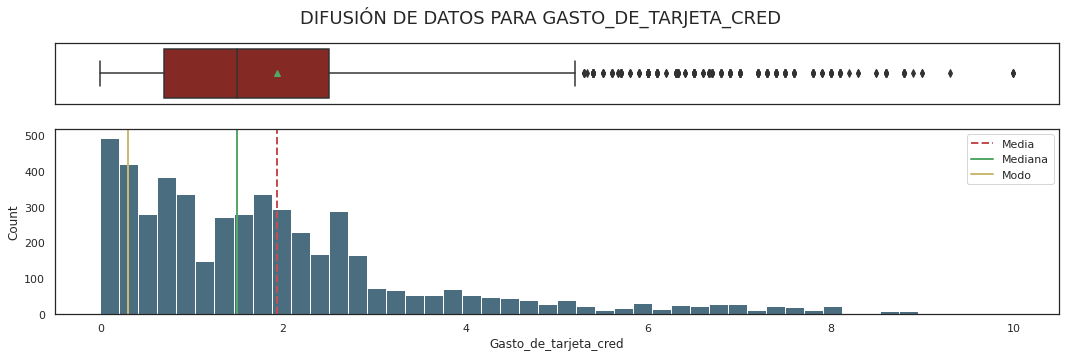

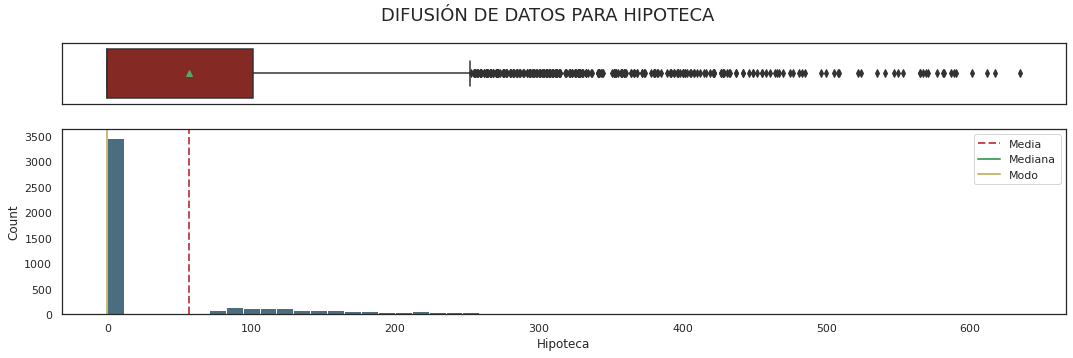

In [ ]:
def dist_box(data):
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(18, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("DIFUSIÓN DE DATOS PARA "+ Name  , fontsize=18)
    sns.boxplot(x=data,showmeans=True, orient='h',color=(rgb_colors[0]),ax=ax_box)
    ax_box.set(xlabel='')
     # solo intento mejorar la visualización. Esto establecerá el fondo en blanco.
    sns.histplot(data, color = (rgb_colors[4]), kde=False, ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Media':mean,'Mediana':median,'Modo':mode})
#seleccione todas las columnas cuantitativas para comprobar el diferencial
list_col=  ['Edad','Experiencia','Sueldo','Gasto_de_tarjeta_cred','Hipoteca']
for i in range(len(list_col)):
    dist_box(df_loan[list_col[i]])

**<font color='red'><h4>Hipótesis</h4></font>**

- Tanto la edad como la experiencia tienen la misma distribución con pico en 5 puntos.
- Los ingresos están sesgados a la derecha y tienen algunos valores atípicos en el lado superior que se pueden recortar.
- El crédito mensual promedio está sesgado a la derecha y tiene muchos valores atípicos en el lado superior que se pueden recortar.
- La hipoteca es en su mayoría 0 . pero está sesgado a la derecha y tiene muchos valores atípicos en el lado superior que se pueden recortar.

**<h3>Cantidad de préstamo en los distintos condados</h3>**

In [ ]:
fig = px.histogram(y=df_loan['Condado'], color=df_loan['Prestamo'], 
              text_auto=True, color_discrete_sequence=(hex_colors[0],hex_colors[4]))
fig.update_layout(title_text='PRESTAMO POR CONDADO', title_x=0.5,font_size=14,yaxis=dict(showgrid=False),
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  xaxis_title_text='Cantidad', # xaxis label
                  yaxis_title_text='Condado',
                  autosize=False,
                  width=1080,
                  height=1280)
fig.update_yaxes(categoryorder='total ascending')
fig.show()

**<font color='red'><h4>Hipótesis</h4></font>**

Como podemos apreciar en el condado de Los Ángeles, San Diego y Santa Clara, son los principales condados en la cual haya mayor cantidad de clientes y por ende los condados donde se podría hacer mayor énfasis, en que los clientes soliciten un préstamo. Esto se lo estudiara mas adelante agrupando la cantidad de clientes por región.

##**7.2 Análisis mas profundo de las caracteristicas de los distintos clientes**

**<h4>Años</h4>**

La edad puede ser un factor vital en la obtención de un préstamo, convirtiendo las edades en contenedores para explorar si existe algún patrón.

In [ ]:
df_loan['Agebin'] = pd.cut(df_loan['Edad'], 
                           bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

**<h4>Ingreso</h4>**

Para comprender los segmentos de clientes que atienden nuevas columnas que nos ayudarán a identificar si el cliente pertenece al grupo de ingresos altos, medios o bajos.

In [ ]:
df_loan["Grupo_ingreso"] = pd.cut(
    x=df_loan["Sueldo"],
    bins=[0, 50, 140, 224],
    labels=["Inferior", "Medio", "Alto"])

### **7.2.1 Cantidad de personas por regiones**


In [ ]:
condados = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'}
df_loan['Region'] = df_loan['Condado'].map(condados)
df_loan.dropna(inplace=True) # dropeamos valores null

**<h3>Mostramos la cantidad de personas que hay por regiones</h3>**

In [ ]:
fig = px.histogram(df_loan, x='Region', 
             barmode='group', height=400,histfunc='count', text_auto=True, 
             color_discrete_sequence=([hex_colors]))
fig.update_layout(title_text='REGION', title_x=0.5,font_size=14,yaxis=dict(showgrid=False),
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)')
fig.update_xaxes(categoryorder='total descending')
fig.show()

**<font color='red'><h4>Conclusion de las regiones y condados</h4></font>**

Como podemos apreciar del análisis anterior de los condados, vemos que el condado Los Ángeles, es una región, por ende es unos de los candidatos a hacer mayor énfasis, ya que es 	uno de los que mas piden prestamos por cantidad de cliente.

Otro condado son los de la región de Bay Área, que sumados es la región mas grande de las 5, que es a la cual se debería hacer mayor énfasis, en que los clientes soliciten un préstamo.

### **7.2.2 Gasto**

Para comprender el gasto de los clientes, se muestran nuevas columnas que dirán si el cliente pertenece a un gasto superior, medio o inferior.

In [ ]:
df_loan.Gasto_de_tarjeta_cred.describe()

count    4989.000000
mean        1.938884
std         1.746840
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: Gasto_de_tarjeta_cred, dtype: float64

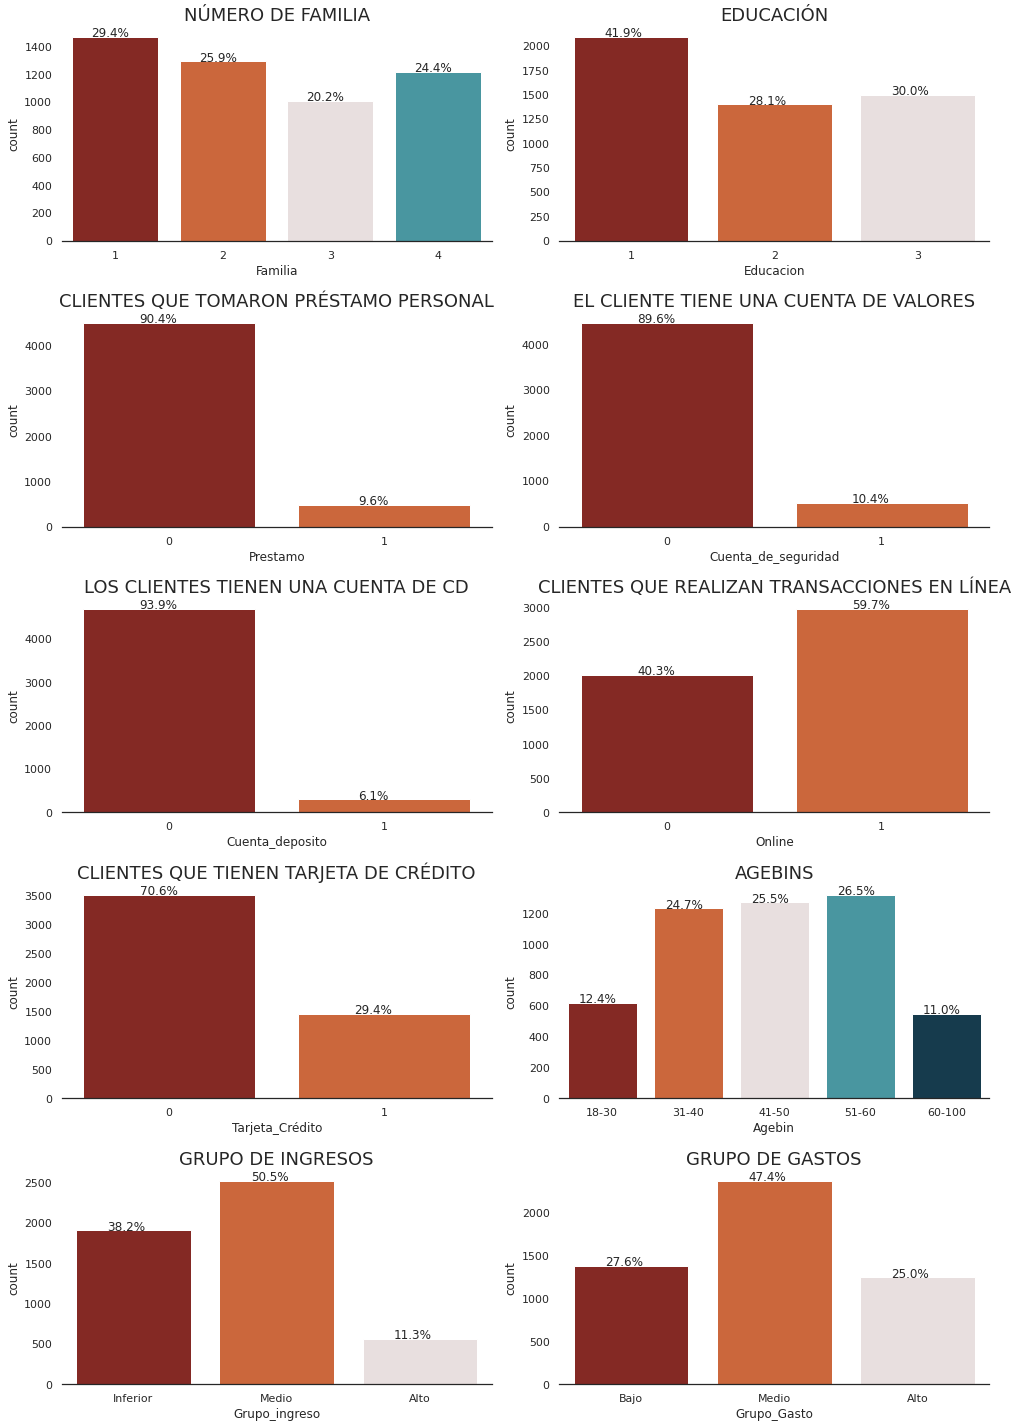

In [ ]:
df_loan["Grupo_Gasto"] = pd.cut( x=df_loan["Gasto_de_tarjeta_cred"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Bajo", "Medio", "Alto"],include_lowest=True ,
)
# Hacer una lista de todas las variables categóricas
cat_columns = ['Familia','Educacion','Prestamo','Cuenta_de_seguridad',
               'Cuenta_deposito','Online','Tarjeta_Crédito','Agebin','Grupo_ingreso','Grupo_Gasto']
title=['Número de Familia','Educación','Clientes que tomaron Préstamo Personal','El cliente tiene una cuenta de valores',
       'Los clientes tienen una cuenta de CD','Clientes que realizan transacciones en línea', 
       'Clientes que tienen tarjeta de crédito','Agebins', 'Grupo de ingresos', 'Grupo de gastos']
plt.figure(figsize=(14,20))

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df_loan[variable].value_counts(ascending=False).index   
                     sns.set_palette(rgb_colors) # setea el color
                     #sns.set_palette('Set2') #setea la paleta Set2
                     ax=sns.countplot(x=df_loan[variable], data=df_loan)
                     sns.despine(top=True,right=True,left=True) # remueve las lineas de la grafica
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_loan[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper(), size=18)

**<font color='red'><h4>Hipótesis</h4></font>**

- ~29,4 % de los clientes son solteros.
- ~41.9% de los clientes son estudiantes universitarios.
- ~9.6% compró un préstamo personal del banco.
- El 10,4 % de los clientes tiene cuenta de valores en el banco
- El 6 % de los clientes tiene una cuenta de CD.
- El 60% de los clientes realizan transacciones en línea.
- El 29,4% de los clientes tienen tarjetas de crédito.
- ~ 75 % de los clientes están en el rango de 31-60.
- ~ 50 % La mayoría de los clientes bancarios pertenecen al grupo de ingresos medios.
- ~48 % de los clientes tiene gasto medio

### **7.2.3 Heatmap**

In [ ]:
# heatmap del dataset 
fig = px.imshow(df_loan.corr(),text_auto=True, aspect="auto",color_continuous_scale=[hex_colors[2],hex_colors[4]])
fig.update_xaxes(side="top")
fig.show()

**<font color='red'><h4>Hipótesis</h4></font>**

- Como era de esperar, la edad y la experiencia están altamente correlacionadas y uno de ellos puede descartarse. Como tuvimos que manejar 0, se descartará la experiencia.
- Los ingresos y el gasto promedio en tarjeta de crédito están correlacionados positivamente.
- La hipoteca tiene muy poca correlación con los ingresos.

### **7.2.4 Grupo de ingreso segun la cuenta**

In [ ]:
fig = px.histogram(df_loan, x='Grupo_ingreso',color='Cuenta_deposito', 
             barmode='group', height=400,histfunc='count', text_auto=True, 
             color_discrete_sequence=[hex_colors[0],hex_colors[4]])
fig.update_layout(title_text='GRUPO DE INGRESOS SEGUN EL DEPOSITO DE CUENTA', title_x=0.5,font_size=14)
fig.show()

**<font color='red'><h4>Hipótesis</h4></font>**

Los grupo de ingresos medios son los que tienen mas cuentas de deposito, quizas uno de los puntos debiles es que en porcentaje a la cantidad de clientes que no poseen cuenta de deposito con respecto a los que poseen una, es menor a los demas grupos de ingresos, esto deberia reveerse y en lo posible incrementar ese porcentaje, ya que son los clientes mas significativos para este banco.

### **7.2.5 Boxplot de comparacion**

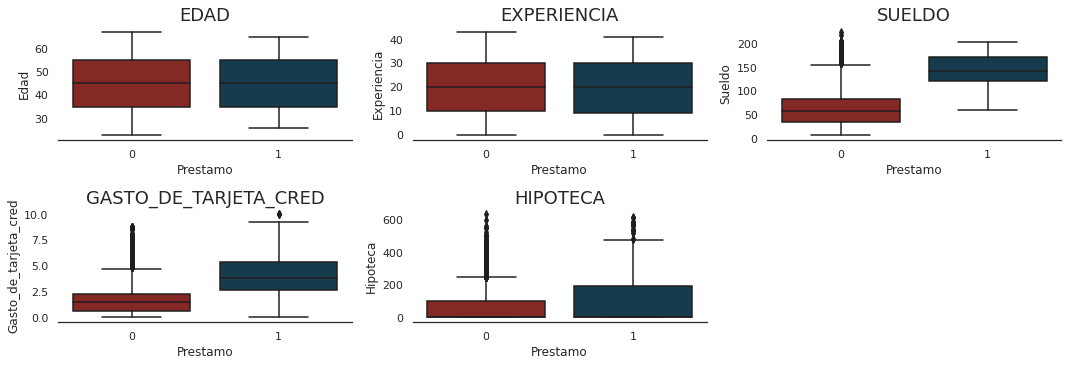

In [ ]:
numeric_columns = ['Edad','Experiencia','Sueldo','Gasto_de_tarjeta_cred','Hipoteca']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette((rgb_colors[0],rgb_colors[4])))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        sns.boxplot(x='Prestamo',y= df_loan[variable], data=df_loan)     
        sns.despine(top=True,right=True,left=True)
        plt.tight_layout()
        plt.title(variable.upper(), size=18)

**<font color='red'><h4>Hipótesis</h4></font>**

Como podemos observar el sueldo y los gastos de tarjetas de creditos son los valores mas significativos para que posean un prestamo activo.

### **7.2.6 Densidad de hipoteca vs prestamos**

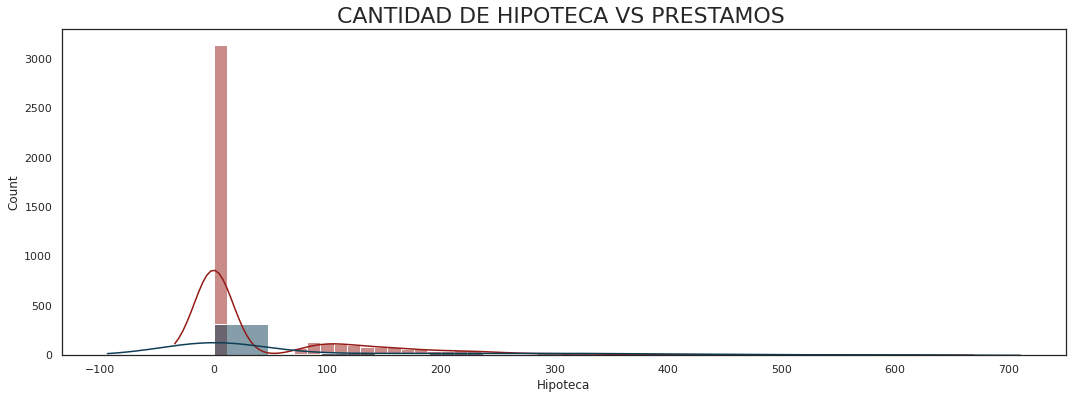

In [ ]:
plt.figure(figsize=(18,6))
plt.title("CANTIDAD DE HIPOTECA VS PRESTAMOS ", size=22)
sns.histplot( df_loan[df_loan['Prestamo'] == 0]['Hipoteca'], color = rgb_colors[0], kde=True, kde_kws=dict(cut=2))
sns.histplot( df_loan[df_loan['Prestamo'] == 1]['Hipoteca'], color = rgb_colors[4], kde=True, kde_kws=dict(cut=2))
plt.show()

**<font color='red'><h4>Hipótesis</h4></font>**

Podemos observar hay gran cantidad de clientes que no poseen prestamos activos, con respecto a la hipoteca, eso puede deberse a que no poseen un sueldo alto o que no les fue necesario solicitar un prestamos mientras poseen una hipoteca.

### **7.2.7 Densidad de la edad vs prestamos**

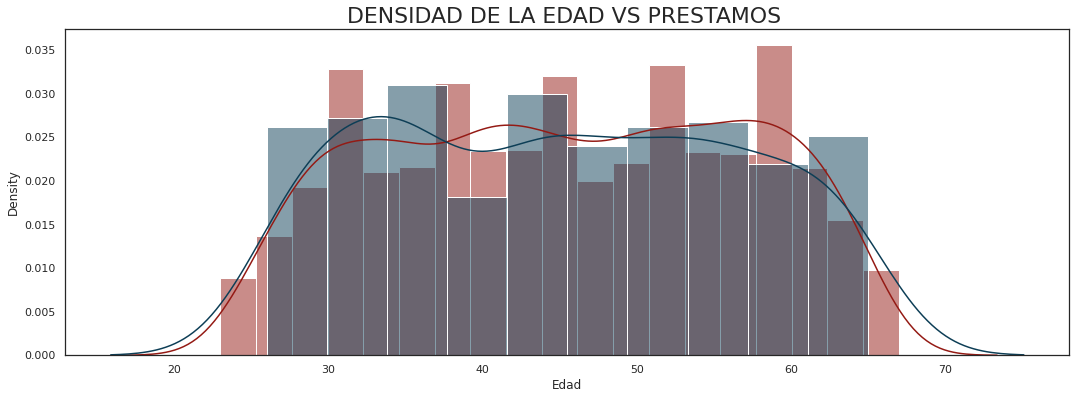

In [ ]:
plt.figure(figsize=(18,6))
plt.title("DENSIDAD DE LA EDAD VS PRESTAMOS ", size=22)
sns.histplot( df_loan[df_loan['Prestamo'] == 0]['Edad'], color = rgb_colors[0], kde=True, stat="density", kde_kws=dict(cut=3))
sns.histplot( df_loan[df_loan['Prestamo'] == 1]['Edad'], color = rgb_colors[4], kde=True, stat="density", kde_kws=dict(cut=3))
plt.show()

**<font color='red'><h4>Hipótesis</h4></font>**

Podemos observar que los clientes con edades mayores a 30 y menores a 60 son los que mas poseen una densidad de prestamos activos o no, con respecto al grupo de edades fuera de ese rango.

### **7.2.8 Gastos de tarjeta de credito segun la educacion**

In [ ]:
fig = px.histogram(df_loan, x='Educacion',y='Gasto_de_tarjeta_cred',color='Prestamo', 
             barmode='group', height=400,histfunc='avg', text_auto=True, 
             color_discrete_sequence=[hex_colors[0],hex_colors[4]])
fig.update_layout(title_text='GASTOS DE TARJETA DE CREDITO SEGUN LA EDUCACION', title_x=0.5,font_size=14)
fig.show()

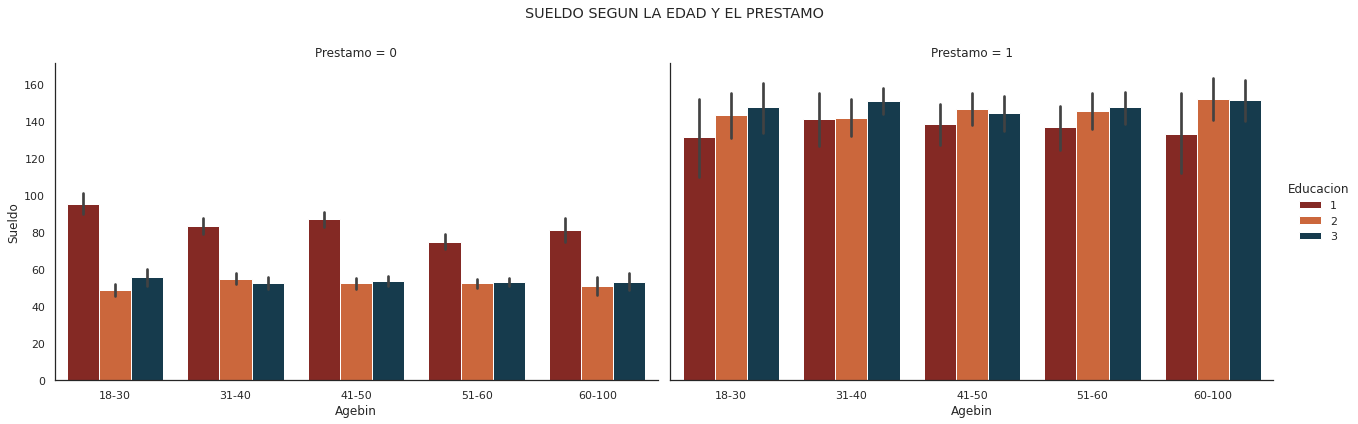

In [ ]:
sns.set_palette(sns.color_palette((rgb_colors[0],rgb_colors[1],rgb_colors[4])))
g=sns.catplot(y='Sueldo',x='Agebin',hue='Educacion',kind='bar',col="Prestamo", data=df_loan,
                   height=6, aspect=1.5)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('SUELDO SEGUN LA EDAD Y EL PRESTAMO')
g.fig.show()

**<font color='red'><h4>Conclusion de los gastos segun la educacion</h4></font>**

Podemos observar que los clientes con mayor educación son los que mas utilizan las tarjetas de crédito y poseen prestamos con respecto al grupo de edades, aunque los que tienen una educación menor son los que poseen mejor sueldo a los que no poseen un préstamo activo.

### **7.2.9 Porcentajes de prestamos**

In [ ]:
# Verificamos la distribución en la columna de destino
fig = px.pie(df_loan, values=df_loan["Prestamo"].value_counts(),  
             height=400, color_discrete_sequence=[hex_colors[0],hex_colors[4]])
fig.update_layout(title_text='PORCENTAJE DE PRESTAMOS', title_x=0.5,font_size=14)

El préstamo personal variable objetivo está muy desequilibrado, donde solo el 9,6% de los clientes han optado previamente por un préstamo personal en el conjunto de datos.

**<font color='red'><h4>Conclusión de los clientes según sus características de ingresos</h4></font>**

- Las personas con mayores ingresos habían optado por préstamos personales antes.
- Las personas con hipotecas altas optaron por el préstamo.
- Los clientes con mayor uso de crédito promedio mensual han optado por el préstamo.
- Los clientes con mayores ingresos tenían un mayor uso promedio de tarjetas de crédito e hipotecas.

# **8. Estructurando el proyecto**

## **8.1 Arbol de decisiones**

**Observaciones:**

Como vemos algunas observaciones en las que la experiencia = -ve, pero como había una fuerte correlación con la edad, descartamos la experiencia.
También creamos la Agebid, el grupo de gasto y el grupo de ingresos para analizar si hay algún patrón en la compra de préstamos en función de estos.

Observaciones en el EDA:
- Las personas con mayores ingresos habían optado por préstamos personales antes.
- Las personas con hipotecas altas optaron por el préstamo.
- Los clientes que hayan optado por el préstamo tendrán un uso de crédito promedio mensual más alto.
- Los clientes con Familia de 3 miembros habían tomado prestados los préstamos con el banco.
- Nivel de educación 2: Graduado y 3: Avanzado/Profesional han tomado préstamos con el banco.
- Clientes que tenían certificado de depósito con el banco habían tomado prestado préstamo previamente
- La mayoría de los clientes que tenían un préstamo personal con el banco utilizaron las instalaciones en línea.
- La mayoría de los clientes que habían tomado préstamos personales antes son de la región de Los Ángeles.
- La proporción de préstamo de endeudamiento es alta en 30 y por debajo y 60 y por encima de los clientes.
- Cuantos más ingresos obtenga, más gastará y tendrá un estilo de vida "grande que la vida".
- Segmentación de clientes para préstamo de endeudamiento basado en EDA
- Los clientes con ingresos más altos tienen hipotecas más altas y un gasto promedio mensual más alto. También tienen certificado de depósito con el banco. Son nuestros clientes de alto perfil.
- Pocos Clientes en el grupo de ingresos medios no tienen hipotecas más altas y tienen menos gasto promedio mensual con tarjeta de crédito. Son clientes de perfil promedio.
- Los clientes en el grupo de ingresos más bajos tienen menos hipotecas (hay pocos valores atípicos), menos gastos mensuales. Son nuestros clientes de bajo perfil.

Acciones para el preprocesamiento de datos:

Muchas variables tienen valores atípicos que necesitan ser tratados. Podemos eliminar Experiencia, País, Código postal y Agebin, Grupo de ingresos, Grupo de gastos.

Vamos a probar sin con las variables utilizadas en el EDA, inferimos que se cumpla la hipotesis o no y que conclusiones sacamos.

**Que variables queremos enviar a nuestro arbol de decision?**

- Agebin
- Codigo Postal
- Condado
- Experiencia
- Grupo de ingreso
- Grupo de Gasto

**Convertir las variables a dummies**

In [ ]:
# Guardar el conjunto de datos antes de tratar los valores atípicos para la regresión logística.
df_Decision = df_loan.copy()
#dropeamos las columnas que no necesitamos para modelar
df_Decision.drop(columns=['Agebin', 'CP','Condado','Experiencia','Grupo_ingreso','Grupo_Gasto'], inplace=True)

X = df_Decision.drop(['Prestamo'], axis=1)
Y = df_Decision['Prestamo']

oneHotCols=['Region','Educacion']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)
#División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)
from sklearn.preprocessing import StandardScaler
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajuste de escalador estándar
X_scaler = scaler.fit(X_train)

# Escalando datos
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))
clasif = DecisionTreeClassifier(random_state=1234,max_depth=4)  #(Maxima cantidad de niveles)
clasif.fit(X_train, y_train) # Entrenamiento

DecisionTreeClassifier(max_depth=4, random_state=1234)

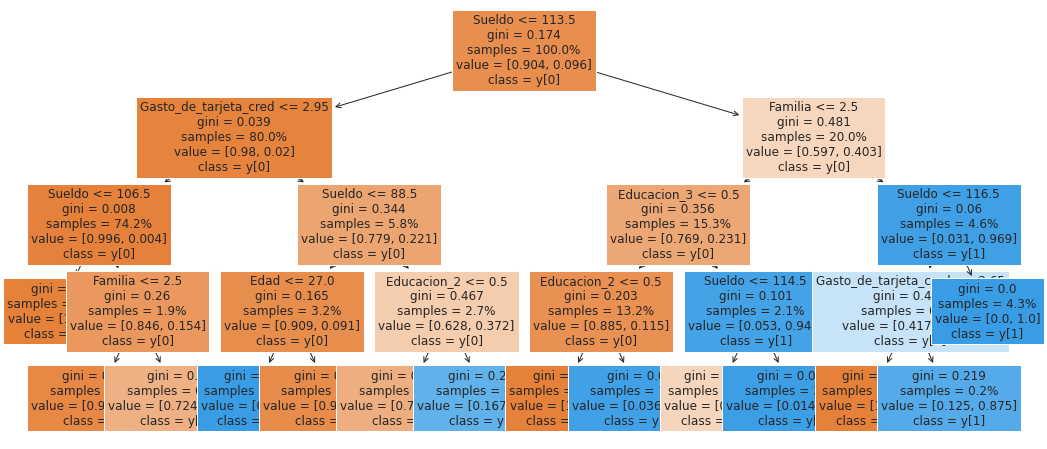

In [ ]:
# Grafica
fig = plt.figure(figsize=(18,8))
tree.plot_tree(clasif,
           feature_names= X_train.columns,
           class_names=True,
           fontsize=12,
           proportion=True,
           filled=True)
plt.show()

## **8.2 Matriz de confusión**

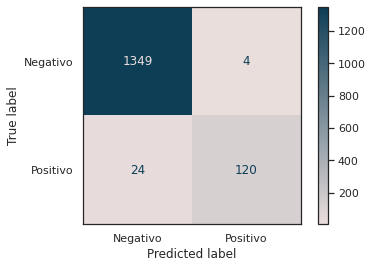

In [ ]:
y_pred = clasif.predict(X_test) # Generando predicciones
ConfusionMatrixDisplay.from_estimator(clasif, X_test, y_test, display_labels=['Negativo', 'Positivo'], cmap=color_matrix)
plt.show()

In [ ]:
# si quisiera saber valores especificos para cada clasificacion:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print('\x1b[1m'+"True negatives o Verdaderos negativos "+f"{tn}"+'\x1b[0m')
print('\x1b[1m'+"Falsos positivos "+f"{fp}"+'\x1b[0m')
print('\x1b[1m'+"Falsos Negativos "+f"{fn}"+'\x1b[0m')
print('\x1b[1m'+"True positives o verdaderos positivos "+f"{tp}"+'\x1b[0m')

True negatives o Verdaderos negativos 1349
Falsos positivos 4
Falsos Negativos 24
True positives o verdaderos positivos 120


**Perspectivas:**

**Verdaderos positivos:**

Realidad: Un cliente quería tomar un préstamo personal. Modelo de predicción: el cliente tomará un préstamo personal. Resultado: El modelo es bueno.

**Verdaderos negativos:**

Realidad: Un cliente no quería tomar un préstamo personal. Modelo de predicción: el cliente no tomará un préstamo personal. Resultado: El negocio no se ve afectado.

**Falsos positivos :**

Realidad: Un cliente no quería tomar un préstamo personal. Modelo de predicción: el cliente tomará un préstamo personal. Resultado: El equipo que se dirige a los clientes potenciales desperdiciaría sus recursos en los clientes que no comprarán un préstamo personal.

**Falsos negativos:**

Realidad: Un cliente quería tomar un préstamo personal. 

Modelo de predicción: el cliente no tomará un préstamo personal. 

Resultado: el equipo de ventas extraña al cliente potencial. Esto es pérdida de oportunidad. El propósito de la campaña era dirigirse a tales clientes. Si el equipo supiera acerca de estos clientes, podrían haber ofrecido algunas buenas tasas de APR/interés.

In [ ]:
#funcion para saber accuracy score de forma manual (no con funciones libreria sklearn)
def accuracy_manual(y_test,y_pred):
  posicion=0
  valores_iguales=0
  while posicion<len(y_test):
    if y_test[posicion].any()==y_pred[posicion].any():
      valores_iguales+=1
    posicion+=1
  return valores_iguales
numero_predicciones_correctas=accuracy_manual(y_test.values, y_pred)
numero_total_predicciones=len(y_test)
accuracy_score_arbol= numero_predicciones_correctas/numero_total_predicciones

print('\x1b[1m'+"Accuracy: "+f"{accuracy_score_arbol}"+'\x1b[0m')

Accuracy: 0.9812959251837008


**Accuracy**

Funciona cuando las clases estan equilibradas o balanceadas.

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('\x1b[1m'+"Accuracy: "+f"{accuracy}"+'\x1b[0m')

Accuracy: 0.9812959251837008


**Presición** 

Cuando nuestros FP (falsos positivos) son un riesgo para nosotros, queremos
minimizar los FP, que la cantidad de veces que queremos que sea 1, que sea 1 y no hayan errores para el lado de 0.


In [ ]:
precision = metrics.precision_score(y_test, y_pred)
print('\x1b[1m'+"Precision: "+f"{precision}"+'\x1b[0m')

Precision: 0.967741935483871


**Recall**

En nuestro contexto, nuestra matriz dijo que cierta cantidad no va a cometer default y resulto que si, procedemos a evaluar. 
Queremos minimizar el numero de FN, queriendo que la metrica salga lo mas alta posible. 

In [ ]:
recall_sensibilidad = metrics.recall_score(y_test, y_pred)
print('\x1b[1m'+"Recall: "+f"{recall_sensibilidad}"+'\x1b[0m')

Recall: 0.8333333333333334


Entonces estoy acertando un 83.3% aprox. diciendo que van a realizar un prestamo y estoy fallando en un 16.7% aprox. en decir que la gente no pedira un prestamo, pero en realidad si lo hara.

**F1-score**

Entre mas cercano este a 1 es un buen modelo. 

In [ ]:
f1_score = metrics.f1_score(y_test, y_pred)
print('\x1b[1m'+"F1 score: "+f"{f1_score}"+'\x1b[0m')

F1 score: 0.8955223880597015


In [ ]:
simple=[accuracy,recall_sensibilidad,f1_score,precision]
text=["Accuracy: ","Recall: ","F1 score: ","Precision: "]
for i,variable in enumerate(simple):
  print('\x1b[1m',text[i], variable , '\x1b[0m')

 Accuracy:  0.9812959251837008 
 Recall:  0.8333333333333334 
 F1 score:  0.8955223880597015 
 Precision:  0.967741935483871 


## **8.3 Conclusión arboles de decisiones Test**
Los valores son positivos, siendo que podran pedir un prestamo en mucho de los casos

##**8.4 Evaluando el modelo**

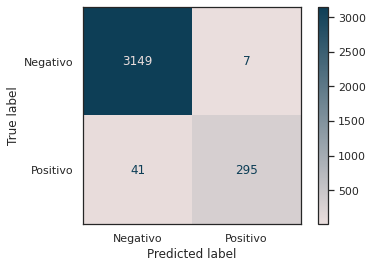

In [ ]:
ConfusionMatrixDisplay.from_estimator(clasif, X_train, y_train, display_labels=['Negativo', 'Positivo'], cmap=color_matrix)
plt.show()

In [ ]:
preds_train = clasif.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train, preds_train)
print('\x1b[1m'+"Train Accuracy: "+f"{train_accuracy}"+'\x1b[0m')

Train Accuracy: 0.9862542955326461


In [ ]:
train_precision = metrics.precision_score(y_train, preds_train)
print('\x1b[1m'+"Train Precision: "+f"{train_precision}"+'\x1b[0m')

Train Precision: 0.9768211920529801


In [ ]:
train_recall = metrics.recall_score(y_train, preds_train)
train_recall
print('\x1b[1m'+"Train Recall: "+f"{train_recall}"+'\x1b[0m')

Train Recall: 0.8779761904761905


In [ ]:
train_f1_score = metrics.f1_score(y_train, preds_train)
train_f1_score
print('\x1b[1m'+"Train F1 score: "+f"{train_f1_score}"+'\x1b[0m')

Train F1 score: 0.9247648902821316


In [ ]:
train=[train_accuracy,train_recall,train_f1_score,train_precision]
text=["Train Accuracy: ","Train Recall: ","Train F1 score: ","Train Precision: "]
for i,variable in enumerate(train):
  print('\x1b[1m',text[i], variable , '\x1b[0m')

 Train Accuracy:  0.9862542955326461 
 Train Recall:  0.8779761904761905 
 Train F1 score:  0.9247648902821316 
 Train Precision:  0.9768211920529801 


## **8.5 Conclusión arboles de decisiones Train**

Pudimos realizar pruebas en todas las métricas con el y_train, y detectamos que nuestras metricas de desempeño es mejor a las del y_test por pequeña diferencia. Podemos decir que el modelo al usar y_train está sobre ajustado o entrenado (overfitting), sirve muy bien para valores que ya entreno, pero no para valores que nunca vio.

Cuando tenemos overfitting, podemos buscar mejorar nuestra métrica de desempeño para nuestro set de validación. No hay una regla exacta, es hacer varios procesos hasta encontrar algo que sirve para nuestros datos, podríamos intentar hacerlo con algunas de las siguientes maneras:
- Itearar.
- feature engineer.
- Obtener un mayor número de datos.
- Ajustar los parámetros de nuestros modelos.
- Crear modelos más simples en caso de ser posible.
- Probar con más modelos.
- Ver si nos sirve otro algoritmo nuevo y es mejor.

# **9. Conclusion**

- Analizamos los datos de la campaña de Préstamos personales usando EDA y usando diferentes modelos como Clasificador de árboles de decisión para generar una probabilidad de que el Cliente solicite un Préstamo.
- Coeficiente de Ingresos, Graduados y Educación Avanzada, Cuenta de deposito, Edad, son positivos, es decir, un aumento de una unidad en estos conducirá a un aumento en las posibilidades de que una persona tome un préstamo.
- El árbol de decisión puede sobre ajustarse fácilmente. Requieren menos pre procesamiento de datos en comparación con la regresión logística y son fáciles de entender.
- Los ingresos, los clientes con título de posgrado, los clientes que tienen 3 miembros en la familia son algunas de las variables más importantes para predecir si los clientes comprarán un préstamo personal.